# Preprocess 49-00081 (San Francisco, CA)

In [19]:
import matplotlib.pyplot
import pandas

from cpe_help import Department

In [9]:
dept = Department('49-00081')
path = dept.tabular_input_dir / '49-00081_Incident-Reports_2012_to_May_2015.csv'
df = pandas.read_csv(path, low_memory=False, skiprows=[1])

df.tail().T

,394230,394231,394232,394233,394234
INCIDENT_UNIQUE_IDENTIFIER,140151367,140471416,140471416,140471416,141082355
INCIDENT_REASON,VEHICLE THEFT,ROBBERY,WARRANTS,NON-CRIMINAL,SUSPICIOUS OCC
INCIDENT_REASON_DESCRIPTION,STOLEN MOTORCYCLE,ROBBERY OF A BANK WITH A GUN,WARRANT ARREST,SEARCH WARRANT SERVICE,INVESTIGATIVE DETENTION
INCIDENT_DAY,Friday,Monday,Monday,Monday,Thursday
INCIDENT_DATE,12/18/15,12/21/15,12/21/15,12/21/15,12/24/15
INCIDENT_TIME,11:17,21:58,21:58,21:58,17:55
LOCATION_DISTRICT,PARK,TENDERLOIN,TENDERLOIN,TENDERLOIN,MISSION
DISPOSITION,NONE,"ARREST, BOOKED","ARREST, BOOKED","ARREST, BOOKED",NONE
LOCATION_FULL_STREET_ADDRESS_OR_INTERSECTION,1100 Block of PIERCE ST,400 Block of EDDY ST,400 Block of EDDY ST,400 Block of EDDY ST,1000 Block of POTRERO AV
LOCATION_LONGITUDE,-122.436,-122.415,-122.415,-122.415,-122.407


In [6]:
dept.load_external_shapefile().crs

{'init': 'epsg:4326'}

In [5]:
df.shape

(394236, 11)

# Date

In [11]:
date = df['INCIDENT_DATE']
datef = pandas.to_datetime(date, format='%m/%d/%y')

In [12]:
datef.describe()

count                  394235
unique                   1378
top       2014-10-11 00:00:00
freq                      519
first     2012-01-01 00:00:00
last      2015-12-24 00:00:00
Name: INCIDENT_DATE, dtype: object

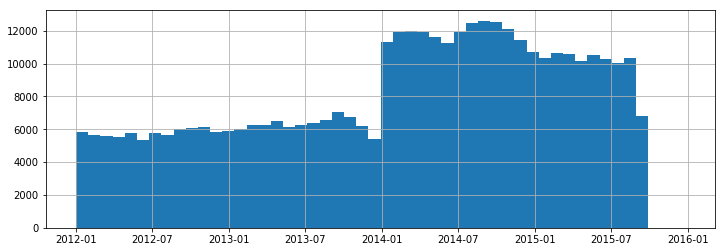

In [15]:
datef.hist(bins=50, figsize=(12, 4))

It's nice having a lot of data...

Also, there's a clear shift in the amount of incidents registered from 2013 to 2014 (I don't know the reason).

# Location

In [16]:
lats = df['LOCATION_LATITUDE']
lons = df['LOCATION_LONGITUDE']

In [17]:
lats.isnull().mean()

0.0

In [18]:
lons.isnull().mean()

0.0

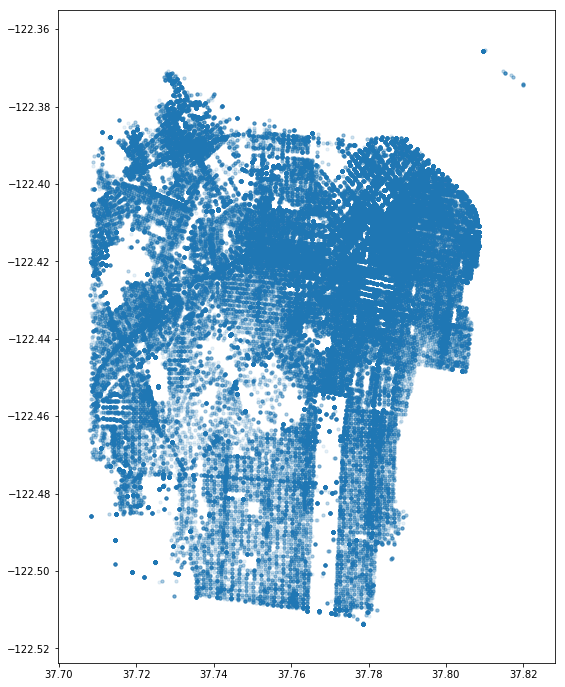

In [23]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12, 12))

ax.set_aspect('equal')
ax.scatter(lats, lons, s=10, alpha=0.1)

Perfect